<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Library importing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from flayers.layers import GaborLayer

## Data loading

> We will be using MNIST for a simple and quick test.

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = repeat(X_train, "b h w ->  b h w c", c=1)/255.0
X_test = repeat(X_test, "b h w ->  b h w c", c=1)/255.0

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

## Definition of simple model

In [ ]:
n_gabors = 4
sigma_i = [0.1, 0.2, 0.1, 0.1]
sigma_j = [0.2, 0.1, 0.2, 0.2]
freq = [10, 10]*2
theta = [0, np.pi/2, np.pi/4, -np.pi/4]
rot_theta = [0, 0]*2
sigma_theta = [0, 0, np.pi/4, -np.pi/4]

In [ ]:
model = tf.keras.Sequential([
    GaborLayer(n_gabors=n_gabors, size=20, imean=0.5, jmean=0.5, sigma_i=sigma_i, sigma_j=sigma_j, freq=freq, 
               theta=theta, rot_theta=rot_theta, sigma_theta=sigma_theta, fs=20, input_shape=(28,28,1)),
    layers.ReLU(),
    layers.MaxPool2D(2),
    GaborLayer(n_gabors=n_gabors, size=10, imean=0.5, jmean=0.5, sigma_i=sigma_i, sigma_j=sigma_j, freq=freq, 
               theta=theta, rot_theta=rot_theta, sigma_theta=sigma_theta, fs=10),
    layers.ReLU(),
    layers.MaxPool2D(2),
    GaborLayer(n_gabors=n_gabors, size=5, imean=0.5, jmean=0.5, sigma_i=sigma_i, sigma_j=sigma_j, freq=freq, 
               theta=theta, rot_theta=rot_theta, sigma_theta=sigma_theta, fs=5),
    layers.ReLU(),
    layers.MaxPool2D(2),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gabor_layer_3 (GaborLayer)   (None, 28, 28, 4)         26        
_________________________________________________________________
re_lu_3 (ReLU)               (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
gabor_layer_4 (GaborLayer)   (None, 14, 14, 4)         26        
_________________________________________________________________
re_lu_4 (ReLU)               (None, 14, 14, 4)         0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
gabor_layer_5 (GaborLayer)   (None, 7, 7, 4)          

We can show the initial Gabor filters:

2022-09-08 12:04:47.616859: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-08 12:04:47.838710: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x5600333a86c0


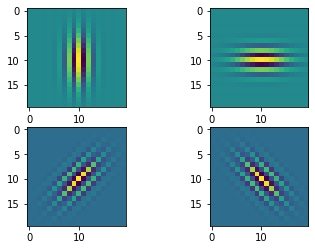

In [ ]:
model.layers[0].show_filters()

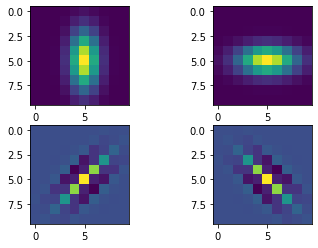

In [ ]:
model.layers[3].show_filters()

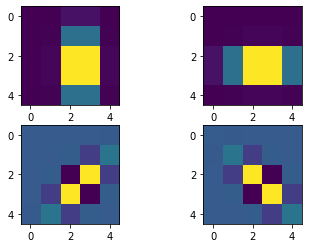

In [ ]:
model.layers[6].show_filters()

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=100, validation_split=0.2)

Epoch 1/100


2022-09-08 12:05:58.537282: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2022-09-08 12:05:58.998947: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


375/375 [==============================] - 45s 88ms/step - loss: 985.9783 - accuracy: 0.1111 - val_loss: 3.0740 - val_accuracy: 0.0936
Epoch 2/100
375/375 [==============================] - 32s 85ms/step - loss: 2.5712 - accuracy: 0.0968 - val_loss: 2.4051 - val_accuracy: 0.0983
Epoch 3/100
375/375 [==============================] - 32s 84ms/step - loss: 2.3618 - accuracy: 0.1037 - val_loss: 2.3399 - val_accuracy: 0.1082
Epoch 4/100
375/375 [==============================] - 33s 87ms/step - loss: 2.3222 - accuracy: 0.1124 - val_loss: 2.3124 - val_accuracy: 0.1216
Epoch 5/100
375/375 [==============================] - 32s 86ms/step - loss: 2.3025 - accuracy: 0.1255 - val_loss: 2.2956 - val_accuracy: 0.1308
Epoch 6/100
375/375 [==============================] - 33s 87ms/step - loss: 2.2889 - accuracy: 0.1331 - val_loss: 2.2823 - val_accuracy: 0.1339
Epoch 7/100
375/375 [==============================] - 31s 84ms/step - loss: 2.2780 - accuracy: 0.1406 - val_loss: 2.2732 - val_accuracy: 0.

Showing the training dynamics:

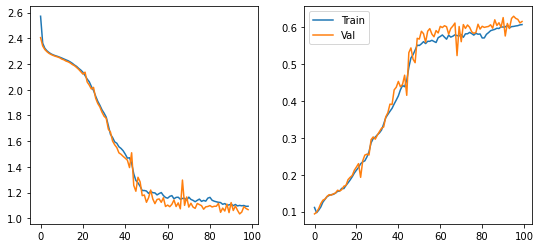

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
axes[0].plot(history.history['loss'][1:], label="Train")
axes[0].plot(history.history['val_loss'][1:], label="Val")
axes[1].plot(history.history['accuracy'], label="Train")
axes[1].plot(history.history['val_accuracy'], label="Val")
plt.legend()
plt.show()

Calculate the metrics in the test set:

In [ ]:
model.evaluate(X_test, Y_test, batch_size=128)

79/79 [==============================] - 3s 33ms/step - loss: 1.0718 - accuracy: 0.6153


[1.071818232536316, 0.6152999997138977]

We can visualize the gabor filters after the training process:

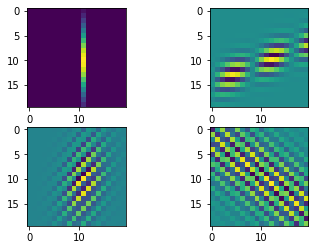

In [ ]:
model.layers[0].show_filters()

In [ ]:
model.layers[2].show_filters()

AttributeError: 'MaxPooling2D' object has no attribute 'show_filters'

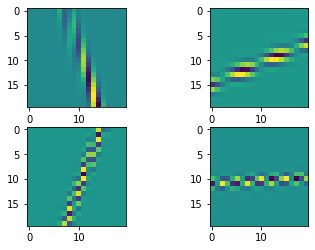

In [ ]:
model.layers[4].show_filters()

We can even check the atributes of the layer to inspect the change in the initial parameters:

In [ ]:
model.layers[0].theta.numpy()*180/np.pi

array([  0.38321877,  90.76502   ,  45.756405  , -47.088924  ],
      dtype=float32)

In [ ]:
model.layers[0].rot_theta.numpy()*180/np.pi

array([ 0.39840868, -0.8525029 , -0.04723335, -1.0895499 ], dtype=float32)

In [ ]:
model.layers[0].sigma_theta.numpy()*180/np.pi

array([-45.138485,   9.870471,  55.021404, -44.676727], dtype=float32)